## Part 1: Summary Statistics and Plots

In [1]:
#Import appropriate libraries
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.stats import shapiro
from sklearn.linear_model import LinearRegression

In [2]:
#Set working directory to folder containing data.
os.chdir("/Users/Devesh/Documents/BS_DS_Takehome/")

In [3]:
data = pd.read_csv("undergrad_takehome_2020.csv")

In [4]:
#see what data we are dealing with
data

,Location number,Month,State,Gross revenue,Fixed cost,Variable cost,Rental cost,Number of products,Owned
0,1,1,TX,48628171.02,9218156.69,24278189.23,365880,4452,False
1,1,2,TX,48107179.24,10587747.35,25116844.41,365880,4452,False
2,1,3,TX,64352278.29,10193873.77,33703499.83,365880,4452,False
3,1,4,TX,45943677.96,8764165.00,24037719.47,365880,4452,False
4,1,5,TX,32761434.98,8022116.43,16432119.18,365880,4452,False
5,1,6,TX,50677036.26,9763597.30,26233794.37,365880,4452,False
6,1,7,TX,28215465.22,8245679.54,14457234.12,365880,4452,False
7,1,8,TX,38955413.84,7863853.69,19744464.29,365880,4452,False
8,1,9,TX,43602895.19,9067861.36,22138203.51,365880,4452,False
9,1,10,TX,52406102.98,9062239.73,26246199.30,365880,4452,False


### Part 1
I begin by first creating a new column for the profit margin variable. The formula I thought was most appropriate is the following: 

$\textrm{Profit Margin} = \frac{\textrm{Gross Revenue - (Fixed Cost + Variable Cost + Rental Cost)}}{\textrm{Gross Revenue}}$

In [5]:
data['Profit'] = data['Gross revenue'] - data['Fixed cost'] - data['Variable cost'] - data['Rental cost']
#Sanity checking if the calculation worked as intended.
data['Profit'].head()

0    14765945.10
1    12036707.48
2    20089024.69
3    12775913.49
4     7941319.37
Name: Profit, dtype: float64

In [6]:
data['Profit_Margin'] = data['Profit']/data['Gross revenue']
#check for missing values due to division
data['Profit_Margin'].isnull().sum()

#check for negative values as well. 
boolprofitable = data['Profit_Margin'] < 0
print("There were {} stores that generated losses.".format(boolprofitable.sum()))

There were 48 stores that generated losses.


In [7]:
#Summary statistics
mean_p_marg = data.groupby('Location number')['Profit_Margin'].mean()
median_p_marg = data.groupby('Location number')['Profit_Margin'].median()

In [8]:
#Sanity checking to see number range.
mean_p_marg.head()

Location number
1    0.269457
2    0.244963
3    0.245642
4    0.203729
5    0.203449
Name: Profit_Margin, dtype: float64

In [9]:
#Sanity checking to see number range.
median_p_marg.head()

Location number
1    0.276999
2    0.252303
3    0.246069
4    0.200863
5    0.217334
Name: Profit_Margin, dtype: float64

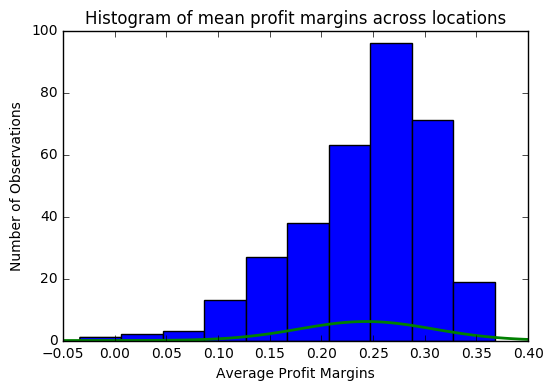

In [69]:
#Visual tests for normality: Histogram plot.
#Try to fit a normal distribution given the parameters of the data series.
mu, std = norm.fit(mean_p_marg)

# Plot the histogram.
plt.hist(mean_p_marg)

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=2)
plt.title("Histogram of mean profit margins across locations")
plt.xlabel("Average Profit Margins")
plt.ylabel("Number of Observations")
plt.show()

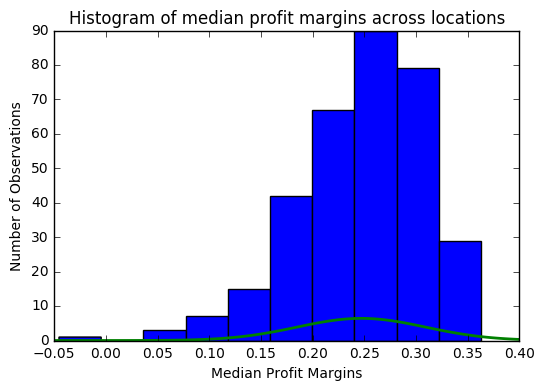

In [68]:
#Try to fit a normal distribution given the parameters of the data series.
mu, std = norm.fit(median_p_marg)

# Plot the histogram.
plt.hist(median_p_marg)

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p,linewidth=2)
plt.title("Histogram of median profit margins across locations")
plt.xlabel("Median Profit Margins")
plt.ylabel("Number of Observations")
plt.show()

A visual inspection of the mean and median profit margins across locations reveals that there is a heavy negative skew in the data, implying that the data are not normally distributed. An attempt to fit a normal distribution to the data using sample mean and standard deviation estimates also did not result in a satisfactory fit. Though the visual test is compelling evidence to reject the hypothesis that the data are normally distributed, statistical tests will give us more evidence allowing us to cast a judgement on the normality of the data.

The statistical test I would like to use in this case is the Shapiro-Wilk test. The Shapiro-Wilk test tests the null hypothesis of a sample $(x_1,...,x_n), x_i \in \mathbb{R}^q$ being generated by a normal distribution. Thus, if we can reject the null hypothesis we can say with (the appropriate degree of) confidence that the data are not normally distributed.

In [12]:
stat, p = shapiro(mean_p_marg)
print('The statistic and associated p value are {:f} and {:f} respectively.'.format(stat, p))
confidence_level = 0.05
if p > confidence_level:
    print('At the 95% level, the mean profit margins look Gaussian')
else:
    print('At the 95% level, the mean profit margins do not look Gaussian')

The statistic and associated p value are 0.956128 and 0.000000 respectively.
At the 95% level, the mean profit margins do not look Gaussian


In [13]:
stat, p = shapiro(median_p_marg)
print('The statistic and associated p value are {:f} and {:f} respectively.'.format(stat, p))
confidence_level = 0.05
if p > confidence_level:
    print('At the 95% level, the median profit margins look Gaussian')
else:
    print('At the 95% level, the median profit margins do not look Gaussian')

The statistic and associated p value are 0.951343 and 0.000000 respectively.
At the 95% level, the median profit margins do not look Gaussian


### Part 2 

In [14]:
#Take another look at the data before reshaping for next problem.
data.head()

,Location number,Month,State,Gross revenue,Fixed cost,Variable cost,Rental cost,Number of products,Owned,Profit,Profit_Margin
0,1,1,TX,48628171.02,9218156.69,24278189.23,365880,4452,False,14765945.10,0.303650
1,1,2,TX,48107179.24,10587747.35,25116844.41,365880,4452,False,12036707.48,0.250206
2,1,3,TX,64352278.29,10193873.77,33703499.83,365880,4452,False,20089024.69,0.312173
3,1,4,TX,45943677.96,8764165.00,24037719.47,365880,4452,False,12775913.49,0.278078
4,1,5,TX,32761434.98,8022116.43,16432119.18,365880,4452,False,7941319.37,0.242398


In [15]:
#For plots, we want the rows (index) to be months, columns to be location, and values to be the gross revenue.
reshaped_data = data.pivot(index = 'Month', columns = 'Location number', values = 'Gross revenue')
#sanity check to see if the data values are indeed gross revenue as required.
reshaped_data.head(15)

Location number,1,2,3,4,5,6,7,8,9,10,...,324,325,326,327,328,329,330,331,332,333
Month,,,,,,,,,,,,,,,,,,,,,
1,48628171.02,26297731.69,30791018.69,23332588.72,11451647.88,1.125376e+07,21116136.18,22784037.69,81007485.44,21026806.21,...,46912675.36,39285050.69,45458013.99,6.816449e+06,6.359983e+07,19224495.31,26544158.67,18718280.06,20949174.05,60955917.39
2,48107179.24,29373940.73,23805331.16,15558905.34,12156756.81,8.454515e+06,27682803.55,22030072.12,69223934.11,21702990.43,...,49374957.69,41969185.18,43643428.65,6.719823e+06,6.839943e+07,20499700.81,39710993.10,22624065.63,29890344.90,63105256.78
3,64352278.29,43106366.50,33916624.99,27300936.93,19439232.09,1.380636e+07,34513429.45,31471755.36,59653802.94,24973954.96,...,55708806.70,55867573.25,49996262.07,7.762130e+06,8.502444e+07,23818643.05,24328024.42,18646437.90,33549551.71,60991360.74
4,45943677.96,27502430.13,24170582.83,16759221.11,16831787.74,1.019136e+07,24944394.46,23726776.77,44529214.38,24665182.77,...,51598906.83,47994515.98,42371912.68,8.804793e+06,7.734170e+07,24243142.34,18819869.30,24022749.48,21463881.11,47536807.72
5,32761434.98,28234770.46,24925332.00,23092744.75,15261458.59,1.020789e+07,28932913.89,20726295.71,61752815.81,27087508.30,...,45738375.25,45013413.18,43416584.46,9.908390e+06,8.715733e+07,20043263.53,19906719.58,28791697.77,26582816.56,46243674.16
6,50677036.26,38553934.10,36980121.91,24204599.59,17055867.09,1.106158e+07,31157233.78,26681240.17,74682004.90,38171759.17,...,57162154.44,51794159.64,54541178.75,1.383635e+07,1.054171e+08,21096461.75,26638739.80,35578829.13,33597232.10,60987486.37
7,28215465.22,23334314.31,21011894.45,19974357.67,10392086.38,7.313554e+06,21438145.13,20266245.16,73143487.18,21930445.45,...,50999765.95,46917785.72,44446446.73,1.000774e+07,8.282984e+07,18456606.53,23967979.46,28366055.02,26963168.10,49778438.86
8,38955413.84,26499772.89,27514438.90,19239491.80,18649597.62,8.820313e+06,24917142.73,28998570.73,73718893.60,25154034.36,...,51401252.73,38981375.42,43240956.34,1.094966e+07,7.549322e+07,26245587.00,32340441.25,29460695.61,27561039.58,56295415.57
9,43602895.19,33323266.84,32256311.50,22183203.45,20003969.04,6.944378e+06,29893243.53,25510630.74,83016711.10,28892130.89,...,51941681.74,48383375.18,50460878.18,1.208646e+07,9.076031e+07,20280506.48,31025887.78,37657611.05,32727585.92,63512936.32


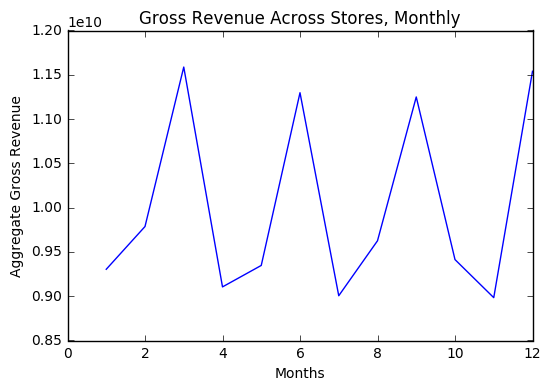

In [16]:
#Sum across rows of reshaped data. 
reshaped_data['Aggregate Revenue'] = reshaped_data.sum(axis = 1)
plt.plot(reshaped_data['Aggregate Revenue'])
plt.xlabel("Months")
plt.ylabel("Aggregate Gross Revenue")
plt.title("Gross Revenue Across Stores, Monthly")
plt.show()

In [17]:
#Take another look at data before aggregating futher to get quarterly revenue.
reshaped_data.head(10)

Location number,1,2,3,4,5,6,7,8,9,10,...,325,326,327,328,329,330,331,332,333,Aggregate Revenue
Month,,,,,,,,,,,,,,,,,,,,,
1,48628171.02,26297731.69,30791018.69,23332588.72,11451647.88,1.125376e+07,21116136.18,22784037.69,81007485.44,21026806.21,...,39285050.69,45458013.99,6.816449e+06,6.359983e+07,19224495.31,26544158.67,18718280.06,20949174.05,60955917.39,9.304129e+09
2,48107179.24,29373940.73,23805331.16,15558905.34,12156756.81,8.454515e+06,27682803.55,22030072.12,69223934.11,21702990.43,...,41969185.18,43643428.65,6.719823e+06,6.839943e+07,20499700.81,39710993.10,22624065.63,29890344.90,63105256.78,9.786843e+09
3,64352278.29,43106366.50,33916624.99,27300936.93,19439232.09,1.380636e+07,34513429.45,31471755.36,59653802.94,24973954.96,...,55867573.25,49996262.07,7.762130e+06,8.502444e+07,23818643.05,24328024.42,18646437.90,33549551.71,60991360.74,1.158736e+10
4,45943677.96,27502430.13,24170582.83,16759221.11,16831787.74,1.019136e+07,24944394.46,23726776.77,44529214.38,24665182.77,...,47994515.98,42371912.68,8.804793e+06,7.734170e+07,24243142.34,18819869.30,24022749.48,21463881.11,47536807.72,9.105208e+09
5,32761434.98,28234770.46,24925332.00,23092744.75,15261458.59,1.020789e+07,28932913.89,20726295.71,61752815.81,27087508.30,...,45013413.18,43416584.46,9.908390e+06,8.715733e+07,20043263.53,19906719.58,28791697.77,26582816.56,46243674.16,9.347461e+09
6,50677036.26,38553934.10,36980121.91,24204599.59,17055867.09,1.106158e+07,31157233.78,26681240.17,74682004.90,38171759.17,...,51794159.64,54541178.75,1.383635e+07,1.054171e+08,21096461.75,26638739.80,35578829.13,33597232.10,60987486.37,1.129764e+10
7,28215465.22,23334314.31,21011894.45,19974357.67,10392086.38,7.313554e+06,21438145.13,20266245.16,73143487.18,21930445.45,...,46917785.72,44446446.73,1.000774e+07,8.282984e+07,18456606.53,23967979.46,28366055.02,26963168.10,49778438.86,9.005478e+09
8,38955413.84,26499772.89,27514438.90,19239491.80,18649597.62,8.820313e+06,24917142.73,28998570.73,73718893.60,25154034.36,...,38981375.42,43240956.34,1.094966e+07,7.549322e+07,26245587.00,32340441.25,29460695.61,27561039.58,56295415.57,9.625942e+09
9,43602895.19,33323266.84,32256311.50,22183203.45,20003969.04,6.944378e+06,29893243.53,25510630.74,83016711.10,28892130.89,...,48383375.18,50460878.18,1.208646e+07,9.076031e+07,20280506.48,31025887.78,37657611.05,32727585.92,63512936.32,1.124965e+10


In [18]:
#Reshaped Agg. Gross is indexed by one:
i = 1
qtr_agg = []
while i < 12: 
    qtr_agg.append(reshaped_data['Aggregate Revenue'][i] + reshaped_data['Aggregate Revenue'][i+1] + reshaped_data['Aggregate Revenue'][i+2])
    i = i + 3
print(qtr_agg)

[30678333357.292995, 29750313424.081001, 29881072438.287991, 29937167124.635014]


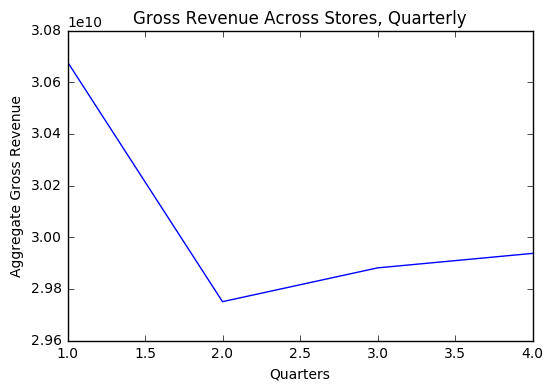

In [19]:
#change to integer
x = list(range(1,5))
plt.plot(x, qtr_agg)
plt.xlabel("Quarters")
plt.ylabel("Aggregate Gross Revenue")
plt.title("Gross Revenue Across Stores, Quarterly")
plt.show()

## Part 2: Data Cleaning

I approached the data cleaning portion of the task by first splitting the data up by the states that the storefronts were located in, and finding the median rent in that particular state. I chose the median over the mean as it seemed a better indicator of what the "average" rent might look light as there is less risk of for the estimate to be skewed by extremely expensive (or cheap) rents within a given region. I then used this median rent as the imputed value for rent where the property had been owned. I chose to be careful with the median calculation, making sure to eliminate zeros from the calculation as one would want to compare the 50% percentile from a sample properties that are **actually** paying rent.

In [20]:
#median ignoring zero; median ignoring time since rent costs don't change MoM in the data. 
data_lease = data[data['Rental cost'] > 0]
median_rent_state = data_lease.groupby('State')['Rental cost'].median()
median_rent_state

State
CA    139615
CO    135750
GA    134910
IL    140265
NJ    146390
TX    140660
WA    174150
Name: Rental cost, dtype: int64

In [21]:
#Create dictionary for easy mapping; did this by hand...should do it in an automated way for larger datasets.
mrs_dict = {"CA": 139615, "CO":135750, "GA":134910, "IL": 140265, "NJ": 146390, "TX": 140660, "WA": 174150}

In [22]:
#create a dataframe containing only the median values for all instances of a particular state appearing.
mapped_df = data['State'].map(mrs_dict)
mapped_df.head(5)

0    140660
1    140660
2    140660
3    140660
4    140660
Name: State, dtype: int64

In [23]:
#replace zero rent with nan, and fill nan using the mapping dataframe.
data['Imputed Rent'] = data['Rental cost'].replace(0,np.nan)
data['Imputed Rent'] = data['Imputed Rent'].fillna(mapped_df)

In [24]:
data['RA_Profit'] = data['Gross revenue'] - data['Fixed cost'] - data['Variable cost'] - data['Imputed Rent']

data['RA_Profit_Margin'] = data['RA_Profit']/data['Gross revenue']
#check for missing values due to division
data['RA_Profit_Margin'].isnull().sum()

#check for negative values as well. 
boolprofitable = data['RA_Profit_Margin'] < 0
print("There were {} stores that generated rent adjusted losses.".format(boolprofitable.sum()))


There were 48 stores that generated rent adjusted losses.


## Part 3: Quantifying Drivers of Success

In [25]:
data.head(5)

,Location number,Month,State,Gross revenue,Fixed cost,Variable cost,Rental cost,Number of products,Owned,Profit,Profit_Margin,Imputed Rent,RA_Profit,RA_Profit_Margin
0,1,1,TX,48628171.02,9218156.69,24278189.23,365880,4452,False,14765945.10,0.303650,365880.0,14765945.10,0.303650
1,1,2,TX,48107179.24,10587747.35,25116844.41,365880,4452,False,12036707.48,0.250206,365880.0,12036707.48,0.250206
2,1,3,TX,64352278.29,10193873.77,33703499.83,365880,4452,False,20089024.69,0.312173,365880.0,20089024.69,0.312173
3,1,4,TX,45943677.96,8764165.00,24037719.47,365880,4452,False,12775913.49,0.278078,365880.0,12775913.49,0.278078
4,1,5,TX,32761434.98,8022116.43,16432119.18,365880,4452,False,7941319.37,0.242398,365880.0,7941319.37,0.242398


While it might seem odd to eliminate information from an already sparse dataset, I thought it would be best to focus my analysis on a set of variables that I thought were key for quantifying the drivers of success. I noticed that fixed costs and rental costs were several orders of magnitude smaller than gross revenue and variable cost and so I felt that perhaps they might not be of first order concern when considering how to efficiently increase profit margins. Likewise I thought that including profits was redundant, as most of the information there was captured in the profit margin variables.

In [26]:
data = data.drop(['Fixed cost', 'Rental cost','Profit', 'Imputed Rent', 'RA_Profit'], axis = 1)

In [27]:
corr = data.corr()
corr

,Location number,Month,Gross revenue,Variable cost,Number of products,Owned,Profit_Margin,RA_Profit_Margin
Location number,1.000000,0.000000e+00,0.025325,0.013897,0.027173,-6.348165e-02,0.072139,0.073362
Month,0.000000,1.000000e+00,0.024980,0.022878,0.000000,-3.006631e-17,0.022522,0.022582
Gross revenue,0.025325,2.498049e-02,1.000000,0.987880,0.451157,1.807397e-01,0.454928,0.455064
Variable cost,0.013897,2.287762e-02,0.987880,1.000000,0.404078,1.715906e-01,0.363968,0.364083
Number of products,0.027173,0.000000e+00,0.451157,0.404078,1.000000,4.173421e-01,0.631586,0.626552
Owned,-0.063482,-3.006631e-17,0.180740,0.171591,0.417342,1.000000e+00,0.164921,0.149035
Profit_Margin,0.072139,2.252158e-02,0.454928,0.363968,0.631586,1.649210e-01,1.000000,0.999847
RA_Profit_Margin,0.073362,2.258182e-02,0.455064,0.364083,0.626552,1.490353e-01,0.999847,1.000000


I first defined what I thought a "strong" correlation would represent given the nature of the data at hand. The threshold I thought was reasonable was any correlation greater than 0.40, but this number is definitely arbitrary.

From the correlation matrix above, we see that the correlations that are significant in magnitude (not necessarily statistically at this stage) are those between (Owned, Number of Products), (Number of Products, Profit Margin), (Variable Cost, Gross Revenue) and (Variable Cost, Number of Products). The extremely high positive correlation between Variable Cost and Gross Revenue is misleading (it does not ex ante make sense to increase variable costs to generate more sales), and might be indicative of some level of endogeneity due to omitted variable bias between the two parameters. 

The relationship between Variable Cost and Number of Products, is less useful but descriptive in nature. One would expect that as the number of products increases, the variable cost would rise in tandem due to the increase in labor or capital required to handle the increased flow of items. While not necessarily useful in quantifying drivers of success, this discussion of variable cost will be useful for the final recommendation. I hence, drop Variable Cost and Gross Revenue (since it is captured in RA_Profit_Margin and Profit_Margin) for the forthcoming analysis.

In [28]:
corr_dropped = corr.drop(['Gross revenue', 'Profit_Margin', 'Variable cost'], axis = 1)
corr_dropped

,Location number,Month,Number of products,Owned,RA_Profit_Margin
Location number,1.000000,0.000000e+00,0.027173,-6.348165e-02,0.073362
Month,0.000000,1.000000e+00,0.000000,-3.006631e-17,0.022582
Gross revenue,0.025325,2.498049e-02,0.451157,1.807397e-01,0.455064
Variable cost,0.013897,2.287762e-02,0.404078,1.715906e-01,0.364083
Number of products,0.027173,0.000000e+00,1.000000,4.173421e-01,0.626552
Owned,-0.063482,-3.006631e-17,0.417342,1.000000e+00,0.149035
Profit_Margin,0.072139,2.252158e-02,0.631586,1.649210e-01,0.999847
RA_Profit_Margin,0.073362,2.258182e-02,0.626552,1.490353e-01,1.000000


By narrowing the scope of the problem, what slowly becomes apparent is the interesting relationship between (Number of Products, \_Margin), (Owned, Number of Products) but weaker correlation between (Owned, \_Margin). We will investigate this futher. Also note that the limited correlation between month and the other listed variables -- it is worth hypothesising that this might be an artefact of the **cyclicality of gross revenues** that we explored in part one of the problem.

In [29]:
#convert to numpy array.
x = np.asarray(data['Number of products'])
y = np.asarray(data['RA_Profit_Margin'])

In [31]:
#reshape arrays for linear model routine.
x = x.reshape(3996, 1)
y = y.reshape(3996, 1)

In [32]:
#set up object for linear model routine.
lm = LinearRegression()

In [33]:
lm.fit(x, y)

/Users/Devesh/anaconda/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
r_sq = lm.score(x, y)

In [43]:
print("The r-squared value is {}, the value of the slope on the regression coefficient is {}".format(r_sq, lm.coef_))

The r-squared value is 0.3925673792264551, the value of the slope on the regression coefficient is [[ 0.00038838]]


The reason why I thought the R-squared value was particularly interesting to look at in this case, was because it gave me as sense as to what portion of the variability in rent adjusted profit margins could be attributed to number of products. In this case, roughly 40% of the variability in rent adjusted profit margins is due to the number of products one owns. Furthermore, since the goal of the model is not to be predictive we are not particularly concerned by the low partial effect of number of products on rent adjusted profit margins. There are a multitude of factors such as omitted variables that might lead to increases in predictive power -- we are mostly concerned with the explanatory features of our modeling. 

Through the correlation analysis and through the above regression analysis, we see that having a lot of products is important for higher rent adjusted profit margins. But recall that the number of products also had a strong correlation with ownership of property, whereas ownership of property did not have a strong correlation with rent adjusted profit margins. Perhaps we might be able to gain actionable insight by investigating this further...


In [46]:
#Group by location number and aggregate (not necessary to take mean) to see number of products per location.
data_groups = data.groupby('Location number')['Number of products', 'Owned', 'RA_Profit_Margin'].mean()
data_groups.head(10)

,Number of products,Owned,RA_Profit_Margin
Location number,,,
1,4452,False,0.269457
2,4502,False,0.244963
3,4620,True,0.240401
4,4481,False,0.203729
5,4533,False,0.203449
6,4373,False,0.150348
7,4495,False,0.214985
8,4506,False,0.204292
9,4789,True,0.353917


In [47]:
#Separate dataframe into locations where things are owned.
df1 = data_groups[data_groups['Owned'] == True]

In [48]:
#Separate dataframe into locations where things are not owned.
df2 = data_groups[data_groups['Owned'] == False]

In [49]:
df1.shape, df2.shape

((36, 3), (297, 3))

In [50]:
#convert to numpy array.
x1 = np.asarray(df1['Number of products'])
y1 = np.asarray(df1['RA_Profit_Margin'])

In [51]:
#convert to numpy array.
x2 = np.asarray(df2['Number of products'])
y2 = np.asarray(df2['RA_Profit_Margin'])

In [52]:
x1.shape, x2.shape, y1.shape, y2.shape

((36,), (297,), (36,), (297,))

In [53]:
#adjust shape for linear model routine.
x1 = x1.reshape(36,1)
x2 = x2.reshape(297,1)
y1 = y1.reshape(36,1)
y2 = y2.reshape(297,1)

In [54]:
#set up linear regression object.
lm1 = LinearRegression()

In [55]:
lm1.fit(x1, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
#set up linear regression object.
lm2 = LinearRegression()

In [57]:
lm2.fit(x2, y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
#obtain r-square
r_sq1 = lm1.score(x1, y1)
r_sq2 = lm2.score(x2, y2)

In [63]:
print("For owned stores, r-squared value is {}, \
the value of the slope on the regression coefficient is {}".format(r_sq1, lm1.coef_))
print("For leased stores, r-squared value is {}, \
the value of the slope on the regression coefficient is {}".format(r_sq2, lm2.coef_))

For owned stores, r-squared value is 0.536723255380578, the value of the slope on the regression coefficient is [[ 0.00047007]]
For leased stores, r-squared value is 0.6720637519519159, the value of the slope on the regression coefficient is [[ 0.00042236]]


### Conclusion

The above analysis has interesting implications for what the end client should do in order to efficiently expand while trying to maximise profit margins as well. The rudimentary regression analysis that we conducted above shows us that roughly 70% of the variability in rent adjusted profit margins are attributed to the number of products on offer in a particular store front, conditional on those stores being leased rather than owned. As a result, moving forward the best way to target higher net profit margins is to begin by leasing stores (via the R-squared analysis), then increasing the number of product offerings available to consumers (via the correlation analysis). Intuitively, there should be some marginally efficient quantity of product offerings that is optimal per store-front, but that can be the subject of future analysis. 

There are some important caveats to consider concerning the validity of the above analysis. The key distinction here being that there is a definite distinction between causation and correlation -- a distinction that is very difficult to discern given the limited scope of the data. To illustrate, while a large number of products may be what is increasing footfall in our retail client (which might would lead to increased top-line revenues, and all else being equal, larger profit margins) it may indeed be the case that a store that is **already** seeing large profit margins might feel confident in expanding product offerings as well. A more careful analysis might involve the use of instrumental variables, but even so, identification of causality remains a very difficult quesstion to answer with precision. A more granular view of variable costs might help target specific bottle-necks that would further increase efficiency, pending the appropriate data. Note that pricing dynamics were difficult to incorporate just with the data hand. 

### Email to CEO

Dear CEO,

My first pass at an analysis aiming to understand the key drivers of success and efficiency, particularly under the lens of **expanding** the business has led me to believe that: 

1. Leasing, rather than owning property, seems to be the most efficient way of setting up future retail storefronts. 
2. Increasing (within reason) product offerings at each storefront may positively affect rent-adjusted profit margins across stores.
3. Seasonal cyclicality in gross revenues can be leveraged to ensure more consistent margins. 

The first point comes from results obtained under a regression framework, from which I found that the majority of the variability in profit margins could be explained by looking at subset of the sample where the underlying property was leased. Leasing property, hence, will give us some semblance of control over the variability in net profit margins going forward. The second point comes from a correlation framework, where I found there to be a strong positive correlation between rent-adjusted profit margins and product offerings, though please do note the sharp distinction between causation and correlation. The third point is a result of merely plotting the trajectory of gross revenues on a month-to-month basis across locations. It might, for instance, be worth considering marketing and pricing schemes that would smooth this cyclicality to the business' benefit (pending strategic analysis). 

There are some caveats to consider as well. The scope of the analysis was constrained by the availability of the data at hand. For instance, a more nuanced look at segments in variable cost might allow us to bolster efficiency, though such an analysis was not feasible given the data at hand. Also, the above analysis has neglected the use of pricing data which might prove to be helpful in further investigations. 

Thank you very much for your time, and please reach out if I may be able to clarify things further. Have a great day!

Best,

Devesh Agrawal
